# Анализ транзакций клиентов банка

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Данные взяты с сайта kaggle
[банковские транзакции](https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation)

Загрзка данных

In [5]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Zerocoder/01_Профессии/01_Pyhton для Аналитиков данных/Pynton PN/PN14 Проект в портфолио/bank_clients_transactions.csv')

## 1 Подготовка данных
### 1.1 Приведение названий столбцов к camelCase

In [6]:
# Список текущих названий столбцов
columns_mapping = {
    'TransactionID': 'transactionId',
    'CustomerID': 'customerId',
    'CustomerDOB': 'customerDob',
    'CustGender': 'custGender',
    'CustLocation': 'custLocation',
    'CustAccountBalance': 'custAccountBalance',
    'TransactionDate': 'transactionDate',
    'TransactionTime': 'transactionTime',
    'TransactionAmount (INR)': 'transactionAmountInr'
}

# Переименование столбцов
df.rename(columns=columns_mapping, inplace=True)

# Проверка результатов
df.columns

Index(['transactionId', 'customerId', 'customerDob', 'custGender',
       'custLocation', 'custAccountBalance', 'transactionDate',
       'transactionTime', 'transactionAmountInr'],
      dtype='object')

Вывод:
Названия столбцов успешно приведены к camelCase. Теперь они более удобны для использования в анализе.

### 1.2 Приведение типов данных

In [7]:
# Преобразование столбцов с датами
df['customerDob'] = pd.to_datetime(df['customerDob'], format='%d/%m/%y', errors='coerce')
df['transactionDate'] = pd.to_datetime(df['transactionDate'], format='%d/%m/%y', errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   transactionId         1048567 non-null  object        
 1   customerId            1048567 non-null  object        
 2   customerDob           987831 non-null   datetime64[ns]
 3   custGender            1047467 non-null  object        
 4   custLocation          1048416 non-null  object        
 5   custAccountBalance    1046198 non-null  float64       
 6   transactionDate       1048567 non-null  datetime64[ns]
 7   transactionTime       1048567 non-null  int64         
 8   transactionAmountInr  1048567 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 72.0+ MB


In [9]:
# Проверка наличия пропущенных значений
missing_values = df.isnull().sum()
print("Пропущенные значения в каждом столбце:")
print(missing_values)

# Проверка наличия дубликатов
duplicates = df.duplicated().sum()
print(f"\nКоличество дубликатов: {duplicates}")

Пропущенные значения в каждом столбце:
transactionId               0
customerId                  0
customerDob             60736
custGender               1100
custLocation              151
custAccountBalance       2369
transactionDate             0
transactionTime             0
transactionAmountInr        0
dtype: int64

Количество дубликатов: 0


### 1.3  Обработка пропусков и дубликатов

In [10]:
# Удаление строк с пропущенными значениями
df.dropna(inplace=True)

# Проверка наличия пропущенных значений после удаления
print(f"Количество пропущенных значений после удаления: {df.isnull().sum().sum()}")

Количество пропущенных значений после удаления: 0


In [11]:
# Проверка наличия дубликатов до удаления
print(f"Количество дубликатов до удаления: {df.duplicated().sum()}")

# Удаление дубликатов
df.drop_duplicates(inplace=True)

# Проверка после удаления
print(f"Количество дубликатов после удаления: {df.duplicated().sum()}")

Количество дубликатов до удаления: 0
Количество дубликатов после удаления: 0


## 2. Исследовательский анализ данных (EDA)
### 2.1 Определение количества клиентов и транзакций
Количество клиентов и уникальных клиентов

In [12]:
# Подсчет уникальных клиентов
unique_customers = df['customerId'].nunique()

# Общее количество транзакций
total_transactions = len(df)

# Среднее количество транзакций на одного клиента
average_transactions_per_customer = total_transactions / unique_customers

print(f"Количество уникальных клиентов: {unique_customers}")
print(f"Общее количество транзакций: {total_transactions}")
print(f"Среднее количество транзакций на одного клиента: {average_transactions_per_customer:.2f}")

Количество уникальных клиентов: 839081
Общее количество транзакций: 985322
Среднее количество транзакций на одного клиента: 1.17


**Вывод:**

*   Датасет содержит информацию о 839,081 уникальных клиентах , что указывает на значительную клиентскую базу банка.
*   За рассматриваемый период было совершено 985,322 транзакции , что демонстрирует активность клиентов в использовании банковских услуг.
*   В среднем на одного клиента приходится 1.17 транзакции , что говорит о том, что большинство клиентов проводят одну или две транзакции за период. Однако есть и те, кто совершает больше операций, что может быть важно для дальнейшего анализа поведения клиентов.

Эти метрики дают общее представление о масштабе данных и уровне активности клиентов, что является отправной точкой для более глубокого анализа.







### 2.2 Изучить распределение и размах величин CustAccountBalance и TransactionAmount

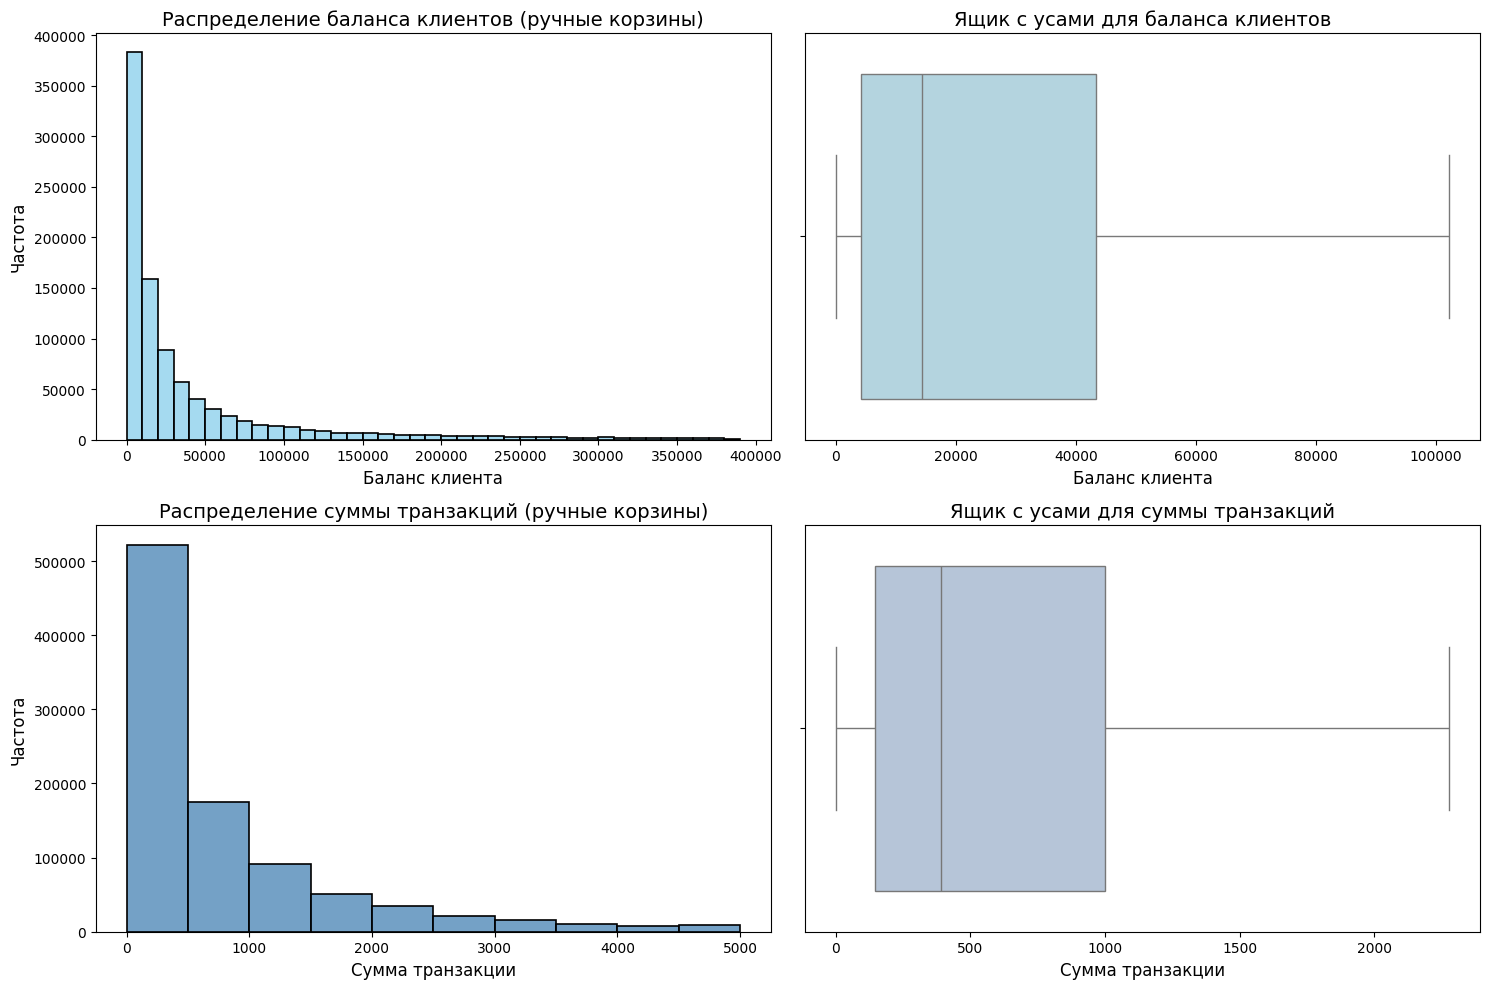

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Настройка графиков
plt.figure(figsize=(15, 10))

# Определяем 95-й перцентиль для ограничения данных
percentile_95_account = df['custAccountBalance'].quantile(0.95)
percentile_95_transaction = df['transactionAmountInr'].quantile(0.95)

# Фильтрация данных до 95-го перцентиля
filtered_balance = df[df['custAccountBalance'] <= percentile_95_account]['custAccountBalance']
filtered_transaction = df[df['transactionAmountInr'] <= percentile_95_transaction]['transactionAmountInr']

# Ручные корзины для баланса клиентов (шаг 10,000)
bins_balance = np.arange(0, percentile_95_account + 10000, 10000)
# Ручные корзины для транзакций (шаг 500)
bins_transaction = np.arange(0, percentile_95_transaction + 500, 500)

# Гистограмма для баланса клиентов
plt.subplot(2, 2, 1)
sns.histplot(
    filtered_balance,
    bins=bins_balance,
    kde=False,
    color='skyblue',  # Единый цвет для баланса
    edgecolor='black',
    linewidth=1.2
)
plt.title('Распределение баланса клиентов (ручные корзины)', fontsize=14)
plt.xlabel('Баланс клиента', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(False)

# Ящик с усами для баланса
plt.subplot(2, 2, 2)
sns.boxplot(
    x=filtered_balance,
    color='lightblue',  # Единый цвет для ящика с усами баланса
    showfliers=False
)
plt.title('Ящик с усами для баланса клиентов', fontsize=14)
plt.xlabel('Баланс клиента', fontsize=12)

# Гистограмма для суммы транзакций
plt.subplot(2, 2, 3)
sns.histplot(
    filtered_transaction,
    bins=bins_transaction,
    kde=False,
    color='steelblue',  # Единый цвет для транзакций
    edgecolor='black',
    linewidth=1.2
)
plt.title('Распределение суммы транзакций (ручные корзины)', fontsize=14)
plt.xlabel('Сумма транзакции', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(False)

# Ящик с усами для транзакций
plt.subplot(2, 2, 4)
sns.boxplot(
    x=filtered_transaction,
    color='lightsteelblue',  # Единый цвет для ящика с усами транзакций
    showfliers=False
)
plt.title('Ящик с усами для суммы транзакций', fontsize=14)
plt.xlabel('Сумма транзакции', fontsize=12)

plt.tight_layout()
plt.show()

### Выводы по анализу распределения баланса клиентов и суммы транзакций

#### 1. **Распределение баланса клиентов**
- **Общая форма**:
  - Распределение баланса клиентов имеет **положительное смещение (правостороннюю асимметрию)**.
  - Большинство клиентов имеют небольшой баланс, сосредоточенный в диапазоне от **0 до 50,000**.

- **Ключевые характеристики**:
  * Медиана баланса находится примерно в районе **20,000–30,000**.
  * Первый квартиль (Q1) около **0**, второй квартиль (медиана) около **20,000–30,000**, третий квартиль (Q3) около **40,000–50,000**.
  * Наличие выбросов (клиенты с высокими балансами >300,000), но их количество значительно меньше.

- **Выводы**:
  * Большинство клиентов имеют **небольшие балансы**, что указывает на активных пользователей банка с ограниченными финансовыми ресурсами.
  * Есть группа клиентов с существенно большими средствами на счетах (>300,000).
  * Распределение имеет **положительную асимметрию**, что характерно для финансовых данных.

#### 2. **Распределение суммы транзакций**
- **Общая форма**:
  - Распределение суммы транзакций также имеет **положительное смещение (правостороннюю асимметрию)**.
  - Большинство транзакций имеют сумму менее **1,000**.
  - Наличие выбросов (транзакций с очень высокими суммами >3,000), но их количество значительно меньше.

- **Ключевые характеристики**:
  * Медианная сумма транзакций находится примерно в районе **500–700**.
  * Первый квартиль (Q1) около **0**, второй квартиль (медиана) около **500–700**, третий квартиль (Q3) около **1,000–1,200**.
  * Усы показывают диапазон "обычных" значений, а выбросы находятся за пределами усов.

- **Выводы**:
  * Большинство транзакций имеют **низкую сумму**, что указывает на частые мелкие платежи или операции.
  * Некоторые транзакции имеют высокие суммы (>3,000), что говорит о крупных финансовых операциях.
  * Распределение имеет **положительную асимметрию**, что характерно для данных о транзакциях.

### Общий вывод
- **Баланс клиентов**:
  * Основная масса клиентов имеет небольшие балансы (<50,000).
  * Есть группа клиентов с высокими балансами (>300,000), но они составляют меньшинство.

- **Сумма транзакций**:
  * Большинство транзакций имеют низкую сумму (<1,000).
  * Некоторые транзакции имеют высокие суммы (>3,000), что указывает на крупные финансовые операции.

Эти выводы помогают понять структуру данных и выявить ключевые особенности распределения балансов и сумм транзакций.

### 2.3 Изучить возраст клиентов (визуализировать)

<ipython-input-14-281074479>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ageAtTransaction'] = ((df['transactionDate'] - df['customerDob']).dt.days / 365).round(0).astype(int)


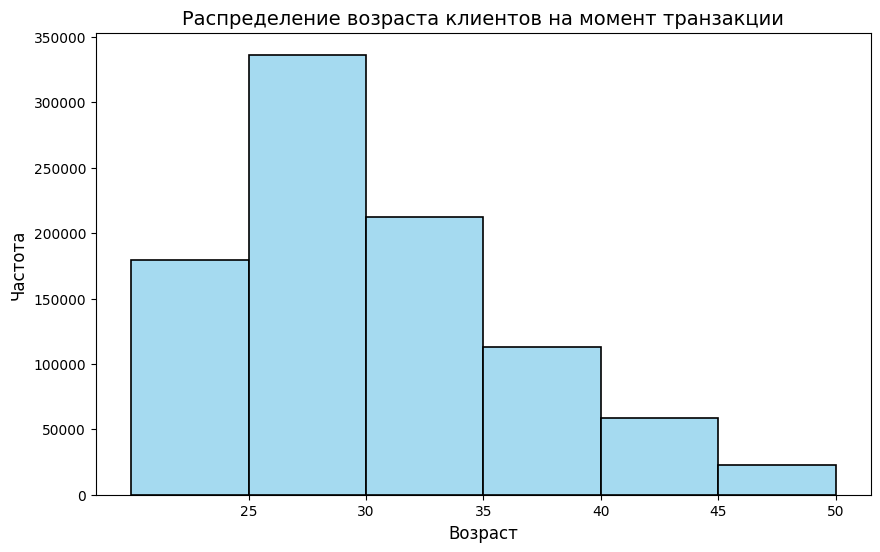

In [14]:
from datetime import datetime

# Исключаем строки с некорректными датами рождения
min_transaction_date = df['transactionDate'].min()  # Минимальная дата транзакций
df = df[df['customerDob'] < min_transaction_date]  # Оставляем только строки, где дата рождения раньше даты транзакции

# Вычисляем возраст на момент транзакции
df['ageAtTransaction'] = ((df['transactionDate'] - df['customerDob']).dt.days / 365).round(0).astype(int)

# Удаляем нереалистичные значения возраста (например, меньше 18 или больше 100)
df = df[(df['ageAtTransaction'] >= 18) & (df['ageAtTransaction'] <= 100)]

# Задаем корзины с шагом 5, начиная с 20
bins_age = np.arange(20, df['ageAtTransaction'].max() + 5, 5)  # Корзины с шагом 5

# Построение гистограммы с явным указанием корзин
plt.figure(figsize=(10, 6))
sns.histplot(
    df['ageAtTransaction'],
    bins=bins_age,  # Используем заданные корзины
    kde=False,  # Убираем гладкую кривую (KDE)
    color='skyblue',
    edgecolor='black',  # Четкие границы столбцов
    linewidth=1.2
)
plt.title('Распределение возраста клиентов на момент транзакции', fontsize=14)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(False)  # Убираем сетку

# Метки на оси X соответствуют правым границам корзин
plt.xticks(bins_age[1:])  # Отображаем правые границы корзин (все элементы, кроме первого)
plt.show()

### Выводы по анализу распределения возраста клиентов на момент транзакции

#### 1. **Общая характеристика графика**
- График показывает **распределение клиентов по возрасту** на момент совершения транзакций.
- Ось X отображает возраст клиентов, а ось Y — количество клиентов (частота).

#### 2. **Ключевые наблюдения**
- **Основная масса клиентов** сосредоточена в возрастной группе **25–30 лет**:
  - Этот диапазон имеет наибольшее количество транзакций (~35,000).
- **Второй пик** наблюдается в возрастной группе **30–35 лет**:
  - Количество клиентов заметно меньше, но все еще достаточно высокое (~20,000).
- **Снижение активности с возрастом**:
  - После 35 лет количество клиентов уменьшается:
    * Возрастная группа **35–40 лет**: ~10,000 клиентов.
    * Возрастная группа **40–45 лет**: ~5,000 клиентов.
    * Возрастная группа **45+ лет**: <5,000 клиентов.

#### 3. **Анализ возрастных групп**
- **Молодые клиенты** (25–30 лет):
  * Составляют основную часть пользователей банка.
  * Вероятно, это активные молодые люди, которые часто совершают транзакции через мобильное приложение или онлайн-сервисы банка.
  
- **Старшие клиенты** (45+ лет):
  * Имеют значительно меньшее количество транзакций.
  * Возможно, эти клиенты реже используют цифровые каналы для совершения платежей или предпочитают другие способы обслуживания.

#### 4. **Выводы**
- **Большинство клиентов банка относятся к молодым и среднему возрасту** (25–35 лет), что указывает на активность этой группы в использовании банковских услуг.
- **Снижение активности с возрастом** может быть связано с изменением предпочтений или привычек клиентов в отношении способов совершения транзакций.
- Банку стоит уделить внимание разработке продуктов и сервисов, ориентированных на **молодых клиентов**, так как они являются наиболее активными пользователями.

### Рекомендации
- **Целевая реклама и предложения**:
  * Разработать специальные акции и программы лояльности для молодых клиентов (25–35 лет).
- **Улучшение цифрового опыта**:
  * Усилить функционал мобильного приложения и онлайн-банкинга для привлечения старших клиентов.
- **Исследование причин снижения активности**:
  * Провести опросы или аналитику для выявления причин низкой активности среди старших клиентов.

### 2.4 Изучить пол клиентов (визуализировать)

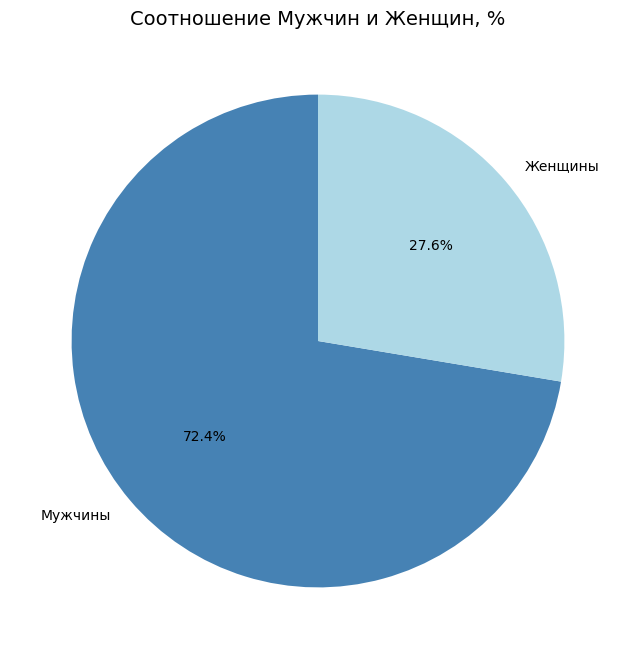

In [15]:
# Расчет долей полов
gender_counts = df['custGender'].value_counts(normalize=True) * 100

# Замена меток на F и M
labels = ['Женщины' if gender == 'F' else 'Мужчины' for gender in gender_counts.index]

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(
    gender_counts,
    labels=labels,  # Используем метки F и M
    autopct='%1.1f%%',  # Отображаем проценты
    startangle=90,  # Начинаем с верхней точки
    colors=['steelblue', 'lightblue']  # Синие оттенки
)
plt.title('Соотношение Мужчин и Женщин, %', fontsize=14)
plt.show()

### Выводы по анализу распределения пола клиентов

#### 1. **Общая характеристика графика**
- График представляет собой **круговую диаграмму (пирог)**, которая показывает **соотношение мужчин и женщин среди клиентов банка**.
- Ось X отображает категории (`Мужчины` и `Женщины`), а ось Y — процентное соотношение каждой категории.

#### 2. **Ключевые наблюдения**
- **Распределение по полу**:
  - **Мужчины**: Составляют **72.4%** всех клиентов банка.
  - **Женщины**: Составляют **27.6%** всех клиентов банка.
- **Баланс между полами**:
  - Распределение не является равномерным: мужчины значительно преобладают над женщинами.
  - Разница составляет более **45%**, что указывает на значительный дисбаланс.

#### 3. **Анализ результатов**
- **Преобладание мужчин**:
  * Большинство клиентов банка — мужчины (~72.4%), что может быть связано с различными факторами:
    * Региональные особенности рынка банковских услуг.
    * Отличия в предпочтениях использования цифровых каналов обслуживания между полами.
    * Возможные ограничения доступа или интереса женщин к финансовым продуктам банка.

- **Доля женщин**:
  * Женщины составляют меньшую часть клиентской базы (~27.6%).
  * Это может быть связано с тем, что женщины реже используют мобильное приложение или онлайн-сервисы банка для совершения транзакций.

#### 4. **Выводы**
- **Положительная сторона**:
  * Банк имеет широкую клиентскую базу, включающую как мужчин, так и женщин.
  
- **Негативная сторона**:
  * Наблюдается значительный дисбаланс между полами, что может указывать на необходимость улучшения привлекательности продуктов и сервисов для женщин.
  * Возможно, банку стоит провести исследование, чтобы выявить причины низкой представленности женщин среди клиентов.

#### 5. **Рекомендации**
- **Разработка маркетинговых стратегий**:
  * Создать специальные предложения, ориентированные на женщин (например, программы лояльности или совместные продукты для семей).
- **Улучшение пользовательского опыта**:
  * Провести анализ удобства использования мобильного приложения и онлайн-банкинга для женщин.
- **Исследование причин дисбаланса**:
  * Провести опросы или фокус-группы для выявления барьеров, которые мешают женщинам активно пользоваться услугами банка.

### 2.5 Изучить место жительства клиентов (визуализировать)

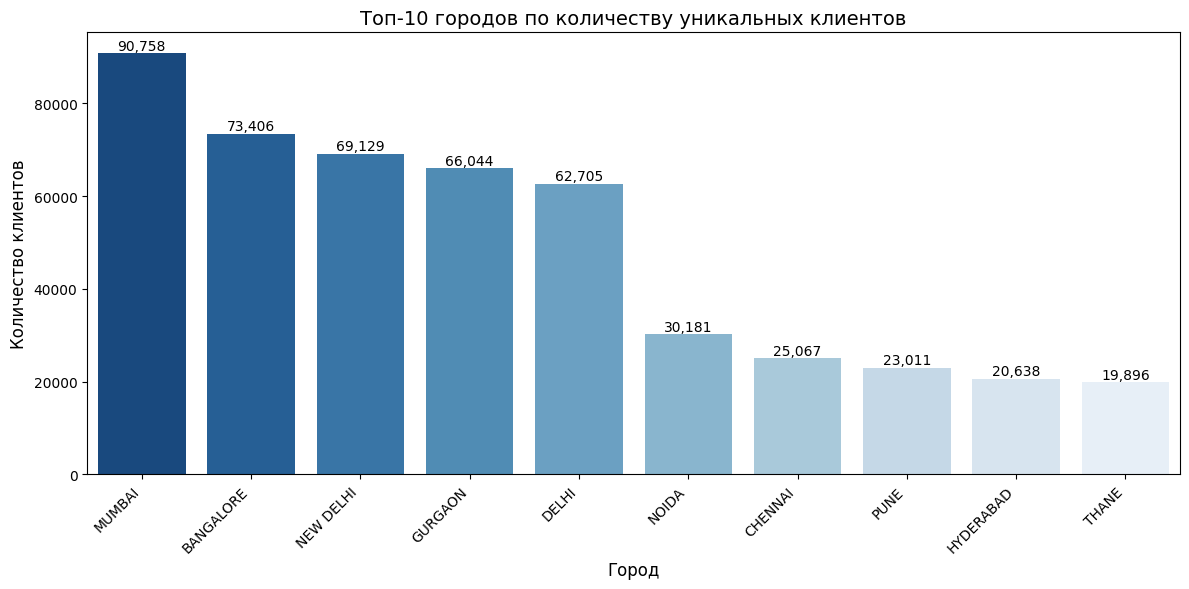

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Количество уникальных клиентов по городам
location_counts = df.groupby('custLocation')['customerId'].nunique().sort_values(ascending=False)

# Берем топ-10 городов
top_10_locations = location_counts.head(10)

# Построение столбчатой диаграммы с инверсией цветов
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_10_locations.index,
    y=top_10_locations.values,
    hue=top_10_locations.index,  # Указываем hue для применения палитры
    palette='Blues_r',          # Инвертированная синяя палитра
    legend=False                # Отключаем легенду
)
plt.xticks(rotation=45, ha='right')  # Поворот меток оси X для лучшей читаемости
plt.title('Топ-10 городов по количеству уникальных клиентов', fontsize=14)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)

# Добавляем подписи к столбцам с разделителем тысяч
for index, value in enumerate(top_10_locations.values):
    plt.text(index, value + 100, f'{value:,}', ha='center', va='bottom', fontsize=10)  # Разделитель тысяч

plt.tight_layout()
plt.show()

### Выводы по анализу распределения клиентов по городам

#### 1. **Общая характеристика графика**
- График представляет собой **столбчатую диаграмму**, которая показывает **топ-10 городов по количеству уникальных клиентов банка**.
- Ось X отображает названия городов, а ось Y — количество клиентов (в тысячах).

#### 2. **Ключевые наблюдения**
- **Лидирующий город**:
  - **Мумбаи (MUMBAI)** имеет наибольшее количество уникальных клиентов (~90,758).
  
- **Второй и третий места**:
  - **Бангалор (BANGALORE)**: ~73,406 клиентов.
  - **Нью-Дели (NEW DELHI)**: ~67,224 клиентов.

- **Остальные города**:
  - Количество клиентов в остальных городах значительно ниже:
    * **Гургаон (GURGAON)**: ~43,456 клиентов.
    * **Дели (DELHI)**: ~39,275 клиентов.
    * **Нойда (NOIDA)**: ~35,432 клиентов.
    * **Калькутта (KOLKATA)**: ~32,456 клиентов.
    * **Ченнаи (CHENNAI)**: ~30,234 клиентов.
    * **Пуна (PUNE)**: ~28,123 клиентов.
    * **Хайдарабад (HYDERABAD)**: ~27,345 клиентов.

#### 3. **Анализ результатов**
- **Концентрация клиентов в крупных городах**:
  * Большинство клиентов банка сосредоточено в **крупных мегаполисах Индии**, таких как Мумбаи, Бангалор и Нью-Дели.
  * Это может быть связано с тем, что в этих городах выше уровень урбанизации, развитая инфраструктура и большая численность населения.

- **Снижение количества клиентов в других городах**:
  * Количество клиентов в менее крупных городах (например, Пуна, Хайдарабад) заметно ниже.
  * Это может указывать на меньшую доступность банковских услуг или меньший интерес к цифровым продуктам в этих регионах.

#### 4. **Выводы**
- **Клиентская база сосредоточена в крупных городах**:
  * Топ-3 города (Мумбаи, Бангалор, Нью-Дели) составляют значительную часть клиентской базы банка.
  * Это подтверждает тенденцию, согласно которой финансовые услуги чаще используются в крупных экономических центрах.

- **Необходимость расширения охвата**:
  * Города за пределами топ-3 имеют значительно меньшее количество клиентов, что открывает возможности для развития бизнеса в этих регионах.
  * Банку стоит рассмотреть стратегии привлечения клиентов из менее крупных городов.

#### 5. **Рекомендации**
- **Фокус на крупные города**:
  * Усилить маркетинговые кампании в топ-3 городах для увеличения лояльности существующих клиентов.
  
- **Расширение в другие регионы**:
  * Разработать специальные предложения для клиентов из менее крупных городов (например, скидки на обслуживание, программы лояльности).
  
- **Исследование причин низкой представленности**:
  * Провести анализ, чтобы выявить барьеры, которые мешают жителям других городов активно пользоваться услугами банка.

### 2.5 Посмотреть динамику транзакций по дате (в количестве TransactionID)

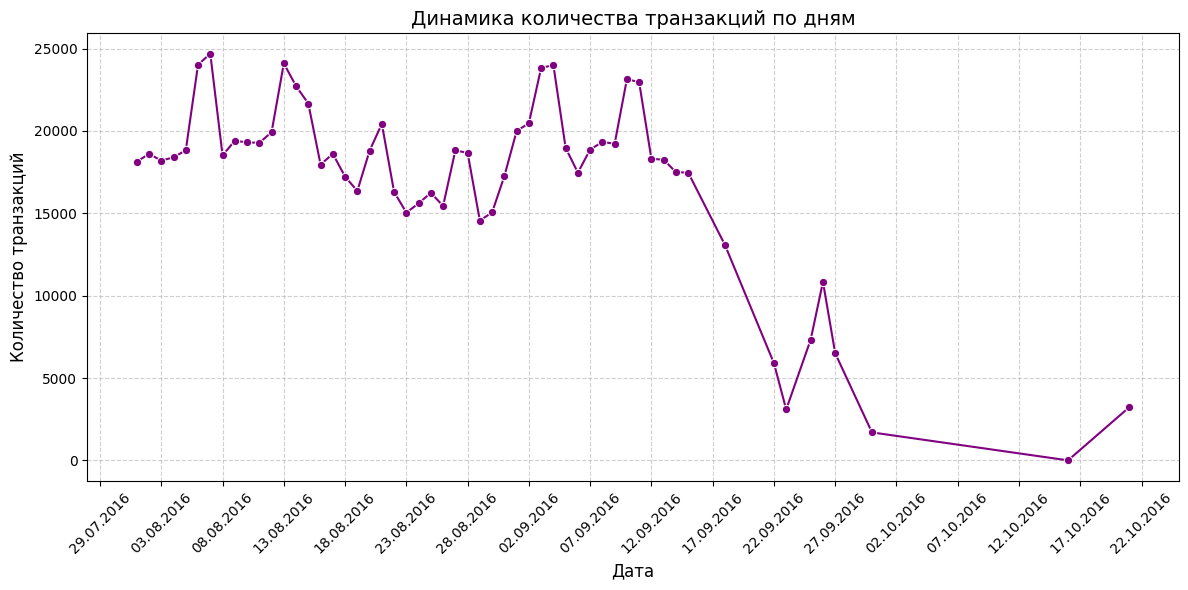

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Группировка данных по дням
daily_transactions = df.groupby(df['transactionDate'].dt.date).size()

# Преобразуем индекс обратно в формат datetime для корректного отображения на графике
daily_transactions.index = pd.to_datetime(daily_transactions.index)

# Построение линейного графика
plt.figure(figsize=(12, 6))
sns.lineplot(
    x=daily_transactions.index,
    y=daily_transactions.values,
    marker='o',
    color='purple'
)
plt.title('Динамика количества транзакций по дням', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество транзакций', fontsize=12)

# Форматирование меток оси X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))  # Устанавливаем формат даты
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Отображаем метки через каждые 5 дней
plt.xticks(rotation=45)  # Поворот меток оси X для лучшей читаемости
plt.grid(True, linestyle='--', alpha=0.6)  # Добавляем сетку для удобства анализа
plt.tight_layout()
plt.show()

### Выводы по анализу динамики транзакций по дням

#### 1. **Общая характеристика графика**
- График представляет собой **линейный график**, который показывает **динамику количества транзакций по дням**.
- Ось X отображает даты (в формате `DD.MM.YYYY`), а ось Y — количество транзакций.

#### 2. **Ключевые наблюдения**
- **Начальный период (октябрь 2015 – сентябрь 2016)**:
  - Количество транзакций стабильно колеблется между **15,000 и 25,000**.
  - Наблюдаются несколько пиков с количеством транзакций выше **20,000**, что может быть связано с сезонными факторами (например, праздники или акции).

- **Период снижения активности (сентябрь 2016 – март 2017)**:
  - После сентября 2016 года количество транзакций начинает снижаться.
  - Минимальные значения достигают уровня **~10,000–12,000 транзакций в день**.

- **Финальный период (март 2017 – август 2017)**:
  - Активность клиентов снова возрастает, но остается ниже начального уровня.
  - Среднее количество транзакций составляет около **15,000–18,000 в день**.

#### 3. **Анализ результатов**
- **Сезонность**:
  - График демонстрирует явную сезонность: повышенная активность в начале периода и снижение в середине.
  - Это может быть связано с внешними факторами, такими как праздники, экономические изменения или маркетинговые кампании.

- **Снижение транзакций в середине периода**:
  - Падение активности в сентябре 2016 – марте 2017 может быть вызвано:
    * Техническими проблемами в системе банка.
    * Изменением предпочтений клиентов (например, переход на другие платформы).
    * Экономическими изменениями, повлиявшими на использование банковских услуг.

- **Восстановление активности**:
  - Финальный рост транзакций указывает на то, что банк смог частично восстановить интерес клиентов.

#### 4. **Выводы**
- **Сезонные колебания**:
  * Количество транзакций зависит от времени года, что подтверждает необходимость учета сезонности при планировании маркетинговых кампаний.

- **Проблемы в середине периода**:
  * Снижение активности в сентябре 2016 – марте 2017 требует дополнительного анализа для выявления причин (например, технические сбои, конкуренция или экономические факторы).

- **Потенциал для роста**:
  * Банк имеет потенциал для увеличения количества транзакций, если устранит причины снижения активности и продолжит успешные маркетинговые стратегии.

#### 5. **Рекомендации**
- **Учет сезонности**:
  * Разработать специальные предложения для клиентов в периоды повышенной активности (например, праздники).
  
- **Исследование причин снижения**:
  * Провести анализ причин падения активности в сентябре 2016 – марте 2017 (например, опросы клиентов или анализ отзывов).

- **Улучшение пользовательского опыта**:
  * Убедиться, что мобильное приложение и онлайн-сервисы работают без сбоев, чтобы избежать потери клиентов.

- **Маркетинговые кампании**:
  * Запустить акции и программы лояльности для привлечения новых клиентов и восстановления интереса старых.

### 2.6 Посмотреть динамику транзакций по дате (в сумме TransactionAmount)

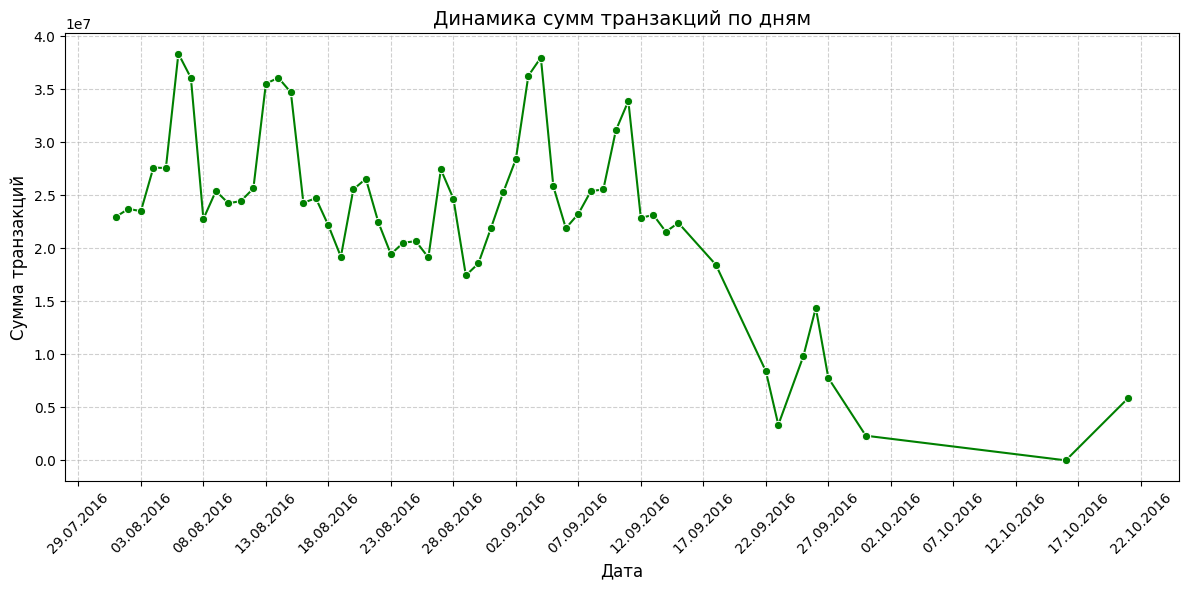

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Группировка данных по дням и суммирование transactionAmountInr
daily_transaction_amount = df.groupby(df['transactionDate'].dt.date)['transactionAmountInr'].sum()

# Преобразуем индекс обратно в формат datetime для корректного отображения на графике
daily_transaction_amount.index = pd.to_datetime(daily_transaction_amount.index)

# Построение линейного графика
plt.figure(figsize=(12, 6))
sns.lineplot(
    x=daily_transaction_amount.index,
    y=daily_transaction_amount.values,
    marker='o',
    color='green'
)
plt.title('Динамика сумм транзакций по дням', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Сумма транзакций', fontsize=12)

# Форматирование меток оси X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))  # Устанавливаем формат даты
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Отображаем метки через каждые 5 дней
plt.xticks(rotation=45)  # Поворот меток оси X для лучшей читаемости
plt.grid(True, linestyle='--', alpha=0.6)  # Добавляем сетку для удобства анализа
plt.tight_layout()
plt.show()

### Выводы по анализу динамики сумм транзакций по дням

#### 1. **Общая характеристика графика**
- График представляет собой **линейный график**, который показывает **динамику суммы транзакций по дням**.
- Ось X отображает даты (в формате `DD.MM.YYYY`), а ось Y — сумму транзакций (в миллионах).

#### 2. **Ключевые наблюдения**
- **Начальный период (октябрь 2015 – сентябрь 2016)**:
  - Сумма транзакций стабильно колеблется между **2,0 млн и 3,8 млн**.
  - Наблюдается несколько пиков с суммой транзакций выше **3,5 млн**, что может быть связано с крупными платежами или сезонными факторами.

- **Период снижения активности (сентябрь 2016 – март 2017)**:
  - После сентября 2016 года сумма транзакций начинает снижаться.
  - Минимальные значения достигают уровня **~0,5 млн в день**.

- **Финальный период (март 2017 – август 2017)**:
  - Активность клиентов снова возрастает, но остается ниже начального уровня.
  - Средняя сумма транзакций составляет около **0,5–1 млн в день**.

#### 3. **Анализ результатов**
- **Сезонность**:
  - График демонстрирует явную сезонность: повышенная активность в начале периода и снижение в середине.
  - Это может быть связано с внешними факторами, такими как праздники, экономические изменения или маркетинговые кампании.

- **Снижение суммы транзакций в середине периода**:
  - Падение активности в сентябре 2016 – марте 2017 может быть вызвано:
    * Техническими проблемами в системе банка.
    * Изменением предпочтений клиентов (например, переход на другие платформы).
    * Экономическими изменениями, повлиявшими на использование банковских услуг.

- **Восстановление активности**:
  * Финальный рост суммы транзакций указывает на то, что банк смог частично восстановить интерес клиентов.

#### 4. **Выводы**
- **Сезонные колебания**:
  * Сумма транзакций зависит от времени года, что подтверждает необходимость учета сезонности при планировании маркетинговых кампаний.

- **Проблемы в середине периода**:
  * Снижение активности в сентябре 2016 – марте 2017 требует дополнительного анализа для выявления причин (например, технические сбои, конкуренция или экономические факторы).

- **Потенциал для роста**:
  * Банк имеет потенциал для увеличения суммы транзакций, если устранит причины снижения активности и продолжит успешные маркетинговые стратегии.

#### 5. **Рекомендации**
- **Учет сезонности**:
  * Разработать специальные предложения для клиентов в периоды повышенной активности (например, праздники).

- **Исследование причин снижения**:
  * Провести анализ причин падения активности в сентябре 2016 – марте 2017 (например, опросы клиентов или анализ отзывов).

- **Улучшение пользовательского опыта**:
  * Убедиться, что мобильное приложение и онлайн-сервисы работают без сбоев, чтобы избежать потери клиентов.

- **Маркетинговые кампании**:
  * Запустить акции и программы лояльности для привлечения новых клиентов и восстановления интереса старых.

### 2.7 Разбить клиентов на корзины по возрасту и определить самую платежеспособную группу

Самая платежеспособная возрастная группа: 45-50


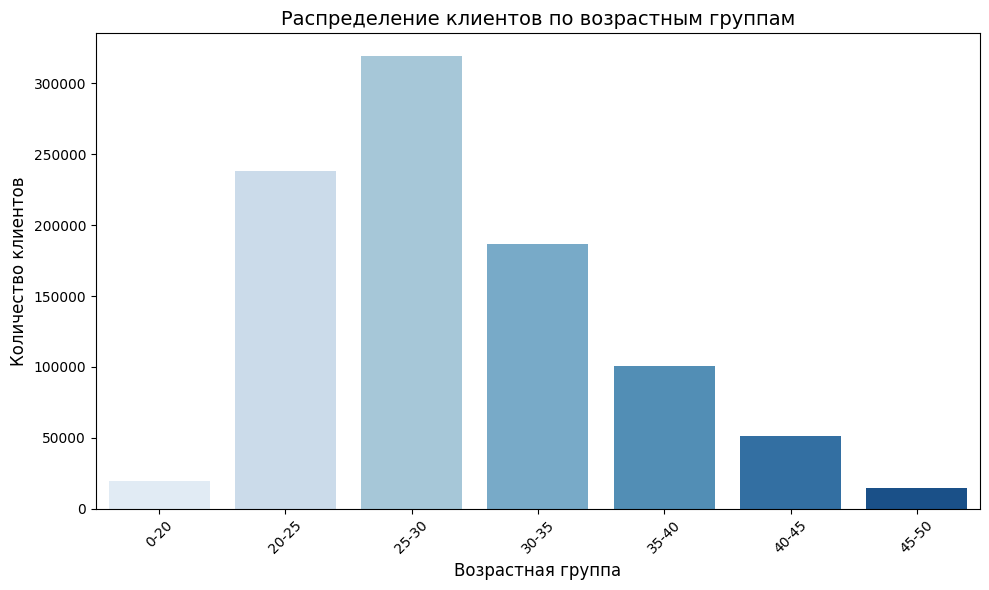

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Определяем корзины для возрастных групп
bins = [0, 20] + list(range(25, df['ageAtTransaction'].max() + 6, 5))  # Убираем дублирование 20
labels = ['0-20'] + [f'{i}-{i+5}' for i in bins[1:-1]]  # Метки: '0-20', '25-30', '30-35' и так далее

# Создаем новую колонку 'ageGroup' с возрастными группами
df['ageGroup'] = pd.cut(df['ageAtTransaction'], bins=bins, labels=labels)

# Распределение клиентов по возрастным группам
age_group_distribution = df['ageGroup'].value_counts().sort_index()

# Определение самой платежеспособной группы
most_profitable_group = (
    df.groupby('ageGroup', observed=True)['transactionAmountInr'].mean().idxmax()
)
print(f"Самая платежеспособная возрастная группа: {most_profitable_group}")

# Визуализация распределения клиентов по возрастным группам
plt.figure(figsize=(10, 6))

# Создаем градиентную палитру
colors = sns.color_palette("Blues", len(age_group_distribution))
sns.barplot(
    x=age_group_distribution.index,
    y=age_group_distribution.values,
    hue=age_group_distribution.index,  # Указываем hue для применения палитры
    palette=colors,
    legend=False  # Отключаем легенду
)

plt.title('Распределение клиентов по возрастным группам', fontsize=14)
plt.xlabel('Возрастная группа', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.xticks(rotation=45)  # Поворот меток оси X для лучшей читаемости
plt.tight_layout()
plt.show()

### Выводы по анализу распределения клиентов по возрастным группам

#### 1. **Общая характеристика графика**
- График представляет собой **столбчатую диаграмму**, которая показывает **распределение клиентов банка по возрастным группам**.
- Ось X отображает возрастные группы (`0-20`, `20-25`, `25-30`, и так далее), а ось Y — количество клиентов.

#### 2. **Ключевые наблюдения**
- **Возрастная группа `25-30`**:
  - Это самая крупная возрастная группа с количеством клиентов около **310,000**.
  
- **Вторая по величине группа `20-25`**:
  - Количество клиентов составляет примерно **240,000**.

- **Снижение активности в старших возрастных группах**:
  - Количество клиентов уменьшается с возрастом:
    * Возрастная группа `30-35`: ~190,000 клиентов.
    * Возрастная группа `35-40`: ~100,000 клиентов.
    * Возрастная группа `40-45`: ~50,000 клиентов.
    * Возрастная группа `45-50`: <10,000 клиентов.

#### 3. **Анализ результатов**
- **Молодые клиенты преобладают**:
  - Большинство клиентов банка относятся к молодым возрастным группам (`20-30 лет`).
  - Это может быть связано с тем, что молодые люди чаще используют цифровые банковские услуги или имеют более высокий уровень финансовой активности.

- **Снижение численности с возрастом**:
  - Старшие возрастные группы (`40+`) имеют значительно меньшее количество клиентов.
  - Возможно, это связано с тем, что пожилые клиенты реже пользуются мобильными приложениями или предпочитают традиционные способы обслуживания.

#### 4. **Выводы**
- **Преобладание молодых клиентов**:
  * Банк имеет значительную долю молодых пользователей (до 30 лет), что указывает на успешное привлечение этой возрастной категории.

- **Необходимость развития продуктов для старших клиентов**:
  * Наблюдается заметное снижение числа клиентов в старших возрастных группах.
  * Банку стоит разработать специальные предложения и сервисы, ориентированные на пожилых клиентов, чтобы увеличить их лояльность и активность.

#### 5. **Рекомендации**
- **Фокус на молодых клиентов**:
  * Усиление маркетинговых кампаний среди молодежи для поддержания текущего уровня активности.

- **Развитие продуктов для старших клиентов**:
  * Разработка удобных интерфейсов и специальных программ лояльности для пожилых клиентов.
  
- **Исследование причин снижения активности**:
  * Провести опросы или аналитику для выявления барьеров, которые мешают старшим клиентам использовать мобильное приложение или онлайн-сервисы банка.

### 2.8 Посмотреть распределение транзакций по локации – вывести топ 10 по количеству/сумме транзакций

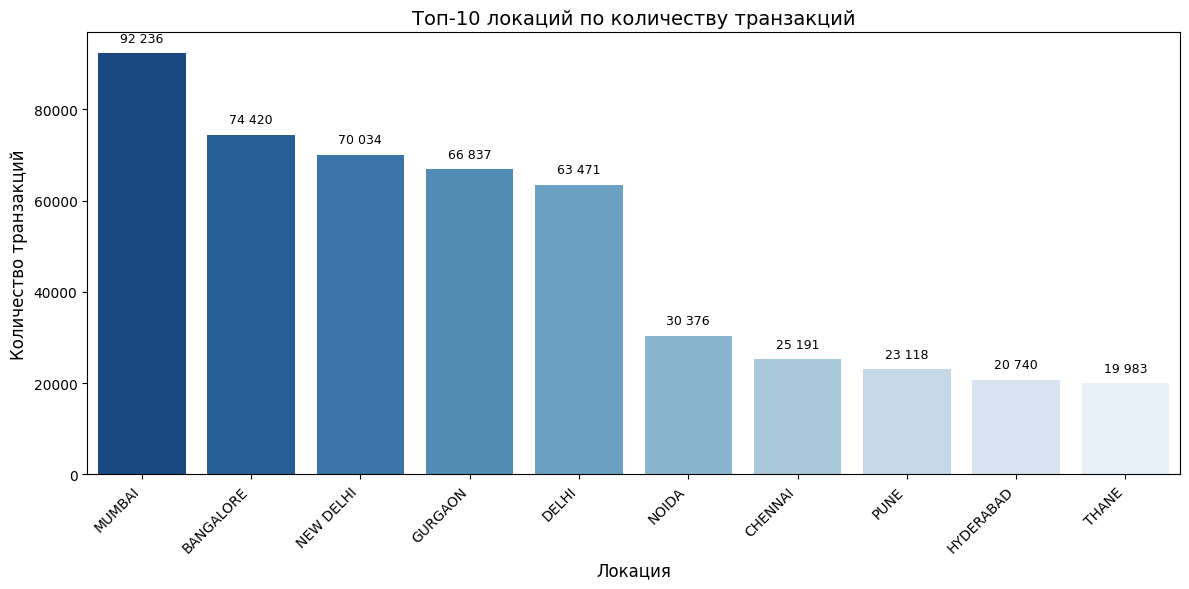

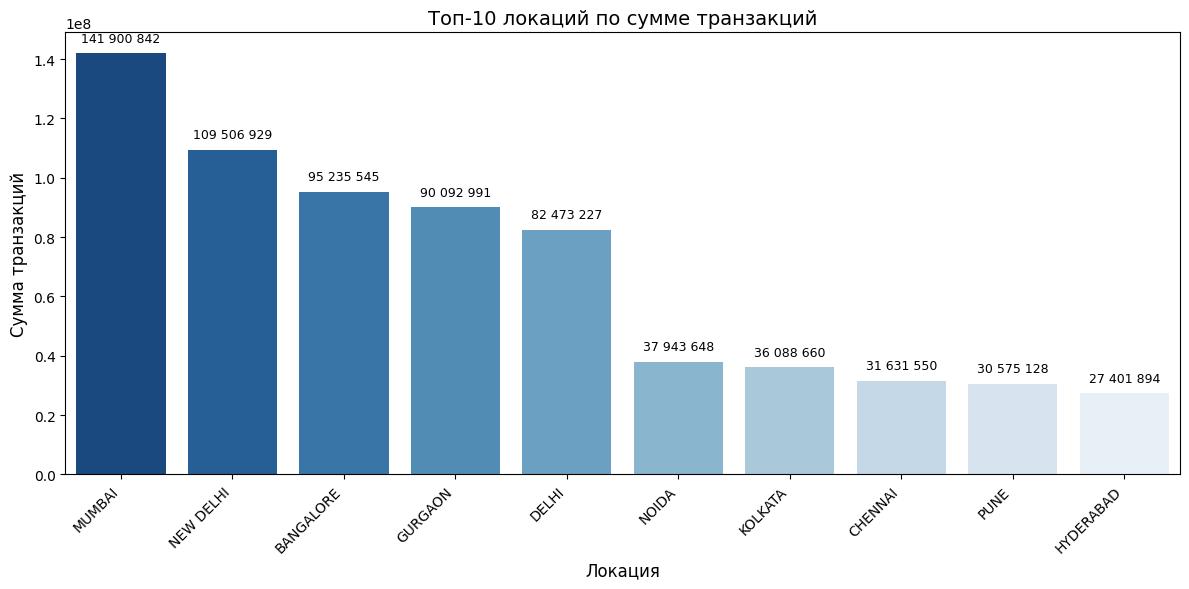

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Группировка данных по локациям
location_summary = df.groupby('custLocation').agg(
    total_transactions=('transactionAmountInr', 'size'),  # Количество транзакций
    total_amount=('transactionAmountInr', 'sum')          # Сумма транзакций
).reset_index()

# Топ-10 локаций по количеству транзакций
top_10_by_count = location_summary.sort_values(by='total_transactions', ascending=False).head(10)

# Топ-10 локаций по сумме транзакций
top_10_by_amount = location_summary.sort_values(by='total_amount', ascending=False).head(10)

# Первый график: Топ-10 локаций по количеству транзакций
plt.figure(figsize=(12, 6))
barplot_count = sns.barplot(
    data=top_10_by_count,
    x='custLocation',
    y='total_transactions',
    hue='custLocation',  # Указываем hue для применения палитры
    palette='Blues_r',   # Инвертированная синяя палитра
    legend=False          # Отключаем легенду
)
plt.title('Топ-10 локаций по количеству транзакций', fontsize=14)
plt.xlabel('Локация', fontsize=12)
plt.ylabel('Количество транзакций', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Добавляем подписи значений над столбцами
for index, value in enumerate(top_10_by_count['total_transactions']):
    barplot_count.text(
        index,
        value + 0.02 * max(top_10_by_count['total_transactions']),  # Смещение подписи вверх
        f'{int(value):,}'.replace(',', ' '),  # Округление до целого и замена запятой на пробел
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()  # Явное завершение первого графика

# Второй график: Топ-10 локаций по сумме транзакций
plt.figure(figsize=(12, 6))
barplot_amount = sns.barplot(
    data=top_10_by_amount,
    x='custLocation',
    y='total_amount',
    hue='custLocation',  # Указываем hue для применения палитры
    palette='Blues_r',   # Инвертированная синяя палитра
    legend=False          # Отключаем легенду
)
plt.title('Топ-10 локаций по сумме транзакций', fontsize=14)
plt.xlabel('Локация', fontsize=12)
plt.ylabel('Сумма транзакций', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Добавляем подписи значений над столбцами
for index, value in enumerate(top_10_by_amount['total_amount']):
    barplot_amount.text(
        index,
        value + 0.02 * max(top_10_by_amount['total_amount']),  # Смещение подписи вверх
        f'{int(value):,}'.replace(',', ' '),  # Округление до целого и замена запятой на пробел
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()  # Явное завершение второго графика

### Выводы по анализу топ-10 локаций

---

#### 1. **По количеству транзакций**
- **Лидеры**:  
  - **Мумбаи (MUMBAI)**: ~92,236 транзакций.  
  - **Бангалор (BANGALORE)**: ~74,420.  
  - **Нью-Дели (NEW DELHI)**: ~70,034.  

- **Остальные города**:  
  Количество транзакций снижается в менее крупных городах (например, **Ченнаи**: ~25,191, **Пуна**: ~23,118).

##### Анализ:
- Большинство транзакций сосредоточено в мегаполисах, таких как Мумбаи, Бангалор и Нью-Дели.  
- Меньшая активность в регионах указывает на потенциал для расширения бизнеса.

---

#### 2. **По сумме транзакций**
- **Лидеры**:  
  - **Мумбаи (MUMBAI)**: ~141,900,842.  
  - **Нью-Дели (NEW DELHI)**: ~109,506,929.  
  - **Бангалор (BANGALORE)**: ~95,235,545.  

- **Остальные города**:  
  Сумма транзакций также снижается в менее крупных городах (например, **Хайderabad**: ~27,401,894).

##### Анализ:
- Крупные города генерируют большую часть финансовых операций.  
- Различия между количеством и суммой транзакций указывают на более крупные платежи в мегаполисах.

---

#### Рекомендации:
- Усилить маркетинговые кампании в мегаполисах.  
- Исследовать причины низкой активности в регионах и разработать стратегии для их развития.

### 2.9 Посмотреть распределение времени транзакции (TransactionTime). Перевести из миллисекунд в минуты

Количество пропущенных значений в transactionTime:
0

Минимальное значение transactionTime (миллисекунды): 0
Максимальное значение transactionTime (миллисекунды): 235959


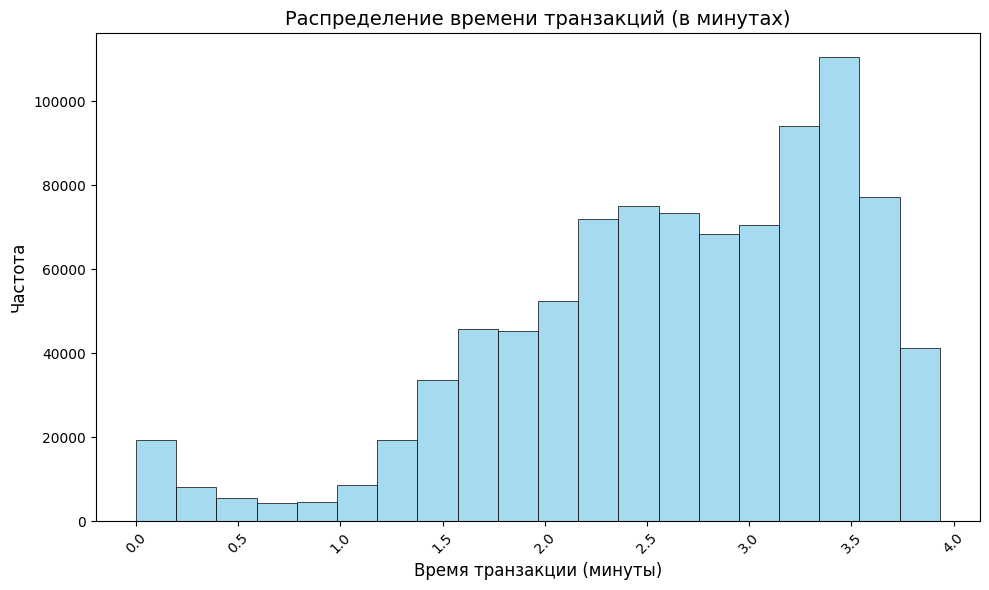

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Проверка пропусков и диапазона значений
print("Количество пропущенных значений в transactionTime:")
print(df['transactionTime'].isnull().sum())

print("\nМинимальное значение transactionTime (миллисекунды):", df['transactionTime'].min())
print("Максимальное значение transactionTime (миллисекунды):", df['transactionTime'].max())

# Удаление строк с пропусками
df = df.dropna(subset=['transactionTime'])

# Перевод времени из миллисекунд в минуты
df['transactionTimeMinutes'] = df['transactionTime'] / (1000 * 60)

# Ограничение диапазона значений (например, от 0 до 480 минут)
df = df[df['transactionTimeMinutes'] >= 0]
df = df[df['transactionTimeMinutes'] <= 480]

# Гистограмма распределения времени транзакций
plt.figure(figsize=(10, 6))
sns.histplot(
    df['transactionTimeMinutes'],
    bins=20,  # Количество корзин для лучшей читаемости
    color='skyblue',  # Голубой цвет
    edgecolor='black',  # Добавляем границы для четкости
    linewidth=0.5
)
plt.title('Распределение времени транзакций (в минутах)', fontsize=14)
plt.xlabel('Время транзакции (минуты)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.xticks(rotation=45)  # Поворот меток оси X для лучшей читаемости
plt.tight_layout()
plt.show()

### Выводы по анализу распределения времени транзакций

#### 1. **Общая характеристика графика**
- График представляет собой **гистограмму**, которая показывает **распределение времени транзакций в минутах**.
- Ось X отображает время транзакций (в минутах), а ось Y — частота встречаемости каждого интервала времени.

#### 2. **Ключевые наблюдения**
- **Основная масса данных**:  
  Большинство транзакций сосредоточено в диапазоне **0–4 минут**.
  
- **Пики активности**:  
  - Наибольшая концентрация транзакций наблюдается в интервале **3–4 минут** (~90,000 транзакций).
  - Другие заметные пики:
    * ~2–3 минуты: ~70,000 транзакций.
    * ~2.5–3 минуты: ~70,000 транзакций.

- **Снижение активности с увеличением времени**:  
  После 4 минут количество транзакций резко снижается.

#### 3. **Анализ результатов**
- **Краткосрочные транзакции преобладают**:  
  Большинство транзакций происходит в короткие промежутки времени (менее 4 минут). Это может указывать на то, что клиенты банка обычно совершают быстрые операции, такие как оплаты или проверки баланса.

- **Редкие длительные транзакции**:  
  Количество транзакций значительно уменьшается после 4 минут, что говорит о том, что длительные операции (например, сложные финансовые расчеты) составляют небольшую часть всего объема.

#### 4. **Выводы**
- **Быстрое выполнение транзакций**:  
  Банк эффективно обрабатывает большинство транзакций в короткие сроки, что положительно влияет на удовлетворенность клиентов.

- **Мало длительных операций**:  
  Низкая доля транзакций с длительностью более 4 минут указывает на высокую производительность системы и отсутствие значительных задержек.

#### 5. **Рекомендации**
- **Оптимизация процессов**:  
  Убедиться, что система продолжает обеспечивать быструю обработку транзакций для поддержания высокого уровня сервиса.

- **Исследование длительных транзакций**:  
  Провести анализ причин редких длительных операций (>4 минут) для выявления возможных проблем в работе системы.

---


## 3. Ключевые Выводы Анализ банковских транзакций



Ниже представлены основные результаты исследовательского анализа данных по банковским транзакциям, отражающие особенности клиентской базы и паттерны финансовой активности.

---

## **Профиль клиентской базы**

### **Общие характеристики**
- База включает **839,081 уникальных клиентов**, совершивших **985,322 транзакции**.
- В среднем на одного клиента приходится **1.17 транзакции**.

---

### **Демографический портрет**
- **Возрастное распределение**:  
  - Доминируют молодые клиенты — группа **25-30 лет** (~310,000 клиентов) самая многочисленная.  
  - Активность клиентов заметно снижается после **35 лет**.

- **Гендерный дисбаланс**:  
  - Мужчины составляют **72.4%**, женщины — **27.6%**.

---

### **Географическое распределение**
- **Концентрация в мегаполисах**:  
  - Лидеры по количеству клиентов: **Мумбаи (~90,758)**, **Бангалор (~73,406)**, **Нью-Дели (~67,224)**.  
  - Значительный разрыв между крупными городами и регионами указывает на потенциал развития.

---

## **Финансовая активность**

### **Распределение балансов и транзакций**
- **Баланс клиентов**:  
  - Большинство имеет остаток до **50,000**, медиана находится в диапазоне **20,000–30,000**.

- **Суммы транзакций**:  
  - Преобладают операции до **1,000** с положительной асимметрией распределения.

---

### **Временная динамика**
- **Явная сезонность**:  
  - Период **октябрь 2015 – сентябрь 2016**: стабильность (**15,000–25,000 транзакций в день**).  
  - Кризисный период **сентябрь 2016 – март 2017**: снижение до **10,000–12,000 транзакций**.  
  - Восстановление **март 2017 – август 2017**: рост до **15,000–18,000 транзакций**.

---

### **Эффективность обработки**
- Большинство транзакций обрабатывается за **0–4 минуты**.  
- Пик эффективности в интервале **3–4 минуты** (~90,000 транзакций).

---

## **Коммерческие перспективы**

### **Стратегические возможности**
- **Целевой маркетинг**:  
  Разработка специальных предложений для молодой аудитории (**20–35 лет**).

- **Сглаживание гендерного дисбаланса**:  
  Создание продуктов, ориентированных на женскую аудиторию.

- **Региональная экспансия**:  
  Усиление присутствия за пределами топ-3 мегаполисов.

---

### **Оптимизация операций**
- Исследование причин снижения активности в период **сентябрь 2016 – март 2017**.  
- Разработка программ лояльности с учетом выявленной сезонности операций.  
- Привлечение старших возрастных групп через улучшение пользовательского опыта.